# TOC
1. [Imports](#Imports)
2. [Data Cleaning and Exploration](#CleanandExplore)
3. [Analysis](#Analysis)
4. [Conclusion](#Conclusion)

## Imports <a name="Imports"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

### Set up the default display settings for the visualisations

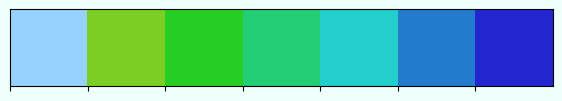

In [2]:
#Set up the default settings for all of the visualisations:

# Reset Seaborn settings
sns.set()
# Reset Matplotlib settings
plt.rcdefaults()

# # Define custom colors for each region

color_list = ['#97D2FF','#7BCE23','#26CE23','#23CE76','#23CECC','#237BCE','#2325CE']

region_color_dict = {
    'Asia & Pacific': '#7BCE23',
    'Europe': '#26CE23',
    'Arab States': '#23CE76',
    'Africa': '#23CECC',
    'The Americas': '#237BCE',
    'CIS': '#2325CE'
}


# Create a regional and year color palette using the defined colors
custom_region_palette = [region_color_dict[region] for region in region_color_dict]

sns.set_palette(color_list)

# Define your custom colors
color_list = ['#97D2FF', '#7BCE23', '#26CE23', '#23CE76', '#23CECC', '#237BCE', '#2325CE']

# Create a ListedColormap
custom_region_cmap = ListedColormap(custom_region_palette)

#Set the default background colours for all visualisations 
plt.rcParams['figure.facecolor'] = '#EEFFFE'

sns.palplot(sns.color_palette())

### Retrieve the data <a name = "retrieve the voter data"></a>

In [3]:
internet_data_df = pd.read_csv("data/internet_and_development_13122023.csv")
internet_data_df.head()

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,NaN,31.448851,4.1,0.408965,NaN,NaN,NaN
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,NaN,NaN,4.0,0.335061,NaN,NaN,NaN
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,4.04,NaN,4.0,0.298088,NaN,NaN,NaN
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,NaN,NaN,3.9,0.283692,NaN,NaN,NaN


## Data Cleaning and Exploration <a name ="CleanandExplore"></a>

### Retrieve the data <a name = "retrieve the protest data"></a>

In [4]:
protest_df=pd.read_csv("data/protester_violence.csv")
protest_df.head(3)

,id,country,ccode,year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...
1,201990002,Canada,20,1990,North America,1,2,25.0,6.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...
2,201990003,Canada,20,1990,North America,1,3,1.0,7.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai..."


### Make sure the data in the columns is mergeable <a name ="ProtestrenameAndReformatData"></a>

In [5]:
#Rename the column of country_txt to Country- to make merging easier:

protest_df = protest_df.rename(columns={'country': 'Country', 'year':'Year'})
protest_df.head(1)

,id,Country,ccode,Year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
0,201990001,Canada,20,1990,North America,1,1,15.0,1.0,1990.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...


In [6]:
# I need to remove all years before 2010 as these are not considered in the main data set
protest_df = protest_df[protest_df['Year'] >= 2010]

#Check that the function has worked correctly. 
protest_df

,id,Country,ccode,Year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
35,202010001,Canada,20,2010,North America,1,1,12.0,2.0,2010.0,...,NaN,arrests,NaN,NaN,NaN,NaN,NaN,NaN,"1. amid protest, torch takes a detour the new ...",the protests were against canada s decision to...
36,202011001,Canada,20,2011,North America,1,1,3.0,7.0,2011.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. royal couple turn deaf ear to protesters an...,a crowd of about 300 protesters staged the noi...
37,202012001,Canada,20,2012,North America,1,1,10.0,2.0,2012.0,...,NaN,crowd dispersal,arrests,NaN,NaN,NaN,NaN,NaN,1. quebec plans to suspend classes over studen...,protests were part of a long student strike ag...
38,202013000,Canada,20,2013,North America,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,202014000,Canada,20,2014,North America,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17140,9102017002,Papua New Guinea,910,2017,Oceania,1,2,15.0,7.0,2017.0,...,NaN,crowd dispersal,NaN,NaN,NaN,NaN,NaN,NaN,"violence, chaos and fraud: fraught papua new g...",peter o neill has been reappointed as prime mi...
17141,9102017003,Papua New Guinea,910,2017,Oceania,1,3,31.0,10.0,2017.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,refugees dig in as camp closes; manus situatio...,refugees on manus island were braced for poten...
17142,9102018000,Papua New Guinea,910,2018,Oceania,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17143,9102019000,Papua New Guinea,910,2019,Oceania,0,0,NaN,NaN,NaN,...,.,NaN,NaN,NaN,NaN,.,NaN,NaN,NaN,NaN


### Remove no protest data <a name="ProtestRemoveNaNs"></a>

In [7]:
#Delete all rows where protest = 0 as this indicates there was no protest. 
value_to_drop = 0

# Use boolean indexing to filter rows where 'protest' is equal to zero, indicating that there was no protest. 
protest_df = protest_df[protest_df['protest'] != value_to_drop]
protest_df.head()

,id,Country,ccode,Year,region,protest,protestnumber,startday,startmonth,startyear,...,protesterdemand4,stateresponse1,stateresponse2,stateresponse3,stateresponse4,stateresponse5,stateresponse6,stateresponse7,sources,notes
35,202010001,Canada,20,2010,North America,1,1,12.0,2.0,2010.0,...,NaN,arrests,NaN,NaN,NaN,NaN,NaN,NaN,"1. amid protest, torch takes a detour the new ...",the protests were against canada s decision to...
36,202011001,Canada,20,2011,North America,1,1,3.0,7.0,2011.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,1. royal couple turn deaf ear to protesters an...,a crowd of about 300 protesters staged the noi...
37,202012001,Canada,20,2012,North America,1,1,10.0,2.0,2012.0,...,NaN,crowd dispersal,arrests,NaN,NaN,NaN,NaN,NaN,1. quebec plans to suspend classes over studen...,protests were part of a long student strike ag...
40,202015001,Canada,20,2015,North America,1,1,6.0,10.0,2015.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,.,agreement shakes up canadian campaign the new ...,"while campaigning on tuesday in whitby, an ont..."
41,202016001,Canada,20,2016,North America,1,1,2.0,2.0,2016.0,...,NaN,ignore,NaN,NaN,NaN,NaN,NaN,NaN,taxi drivers of the world unite; anti uber dem...,ottawa: taxi drivers from toronto were among t...


### Remove Unecessary columns from the data <a name ="Protestremovecolumns"></a>

In [8]:
#Work out which columns to keep
columns_to_keep =['Country','Year','protest','sources']


selected_protestor_df = protest_df[columns_to_keep]
selected_protestor_df

,Country,Year,protest,sources
35,Canada,2010,1,"1. amid protest, torch takes a detour the new ..."
36,Canada,2011,1,1. royal couple turn deaf ear to protesters an...
37,Canada,2012,1,1. quebec plans to suspend classes over studen...
40,Canada,2015,1,agreement shakes up canadian campaign the new ...
41,Canada,2016,1,taxi drivers of the world unite; anti uber dem...
...,...,...,...,...
17136,Papua New Guinea,2014,1,probe into killing of manus detainee; manus is...
17138,Papua New Guinea,2016,1,papua new guinea: reports of up to four people...
17139,Papua New Guinea,2017,1,bougainville imposes moratorium on panguna min...
17140,Papua New Guinea,2017,1,"violence, chaos and fraud: fraught papua new g..."


In [9]:
protest_total_df = protest_df.groupby(['Year', 'Country'])['protest'].sum().reset_index()
protest_total_df = protest_total_df.rename(columns={'protest': 'Protest Total'})
protest_total_df

,Year,Country,Protest Total
0,2010,Albania,6
1,2010,Argentina,3
2,2010,Armenia,6
3,2010,Azerbaijan,6
4,2010,Bangladesh,4
...,...,...,...
1092,2020,Thailand,5
1093,2020,Tunisia,1
1094,2020,Ukraine,1
1095,2020,United Kingdom,4


### Retrieve the main DataSet <a name="RetrievemainDataSet"></a>

In [10]:
internet_data_df = pd.read_csv("data/internet_and_development_13122023.csv")
internet_data_df.head()

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,NaN,31.448851,4.1,0.408965,NaN,NaN,NaN
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,NaN,NaN,4.0,0.335061,NaN,NaN,NaN
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,4.04,NaN,4.0,0.298088,NaN,NaN,NaN
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,NaN,NaN,3.9,0.283692,NaN,NaN,NaN


### Merge the Data <a name="MergeTheData"></a>

In [11]:
merged_df = pd.merge(internet_data_df,protest_total_df, left_on = ['Country', 'Year'],right_on =['Country', 'Year'], how ='outer')
merged_df

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14,NaN
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,NaN,31.448851,4.1,0.408965,NaN,NaN,NaN,4.0
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,NaN,NaN,4.0,0.335061,NaN,NaN,NaN,1.0
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,4.04,NaN,4.0,0.298088,NaN,NaN,NaN,1.0
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,NaN,NaN,3.9,0.283692,NaN,NaN,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,Dominican Republic,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2832,Iran,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2833,Macedonia,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2834,Russia,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


### Check Columns and constraints <a name="CheckMerge"></a>

In [12]:
#Check Shape
merged_df.shape

(2836, 16)

In [13]:
#Check the data types
merged_df.dtypes

Country                                       object
Region                                        object
ISO                                           object
Year                                           int64
Individuals using the Internet, total (%)    float64
GNI per capita                               float64
GINI Index                                   float64
GDP Per Capita                               float64
Happiness Index                              float64
Literacy                                     float64
Suicide Rates                                float64
CO2 Emissions                                float64
Internet_Price                               float64
Internet Price Ratio                         float64
Voter Turnout                                float64
Protest Total                                float64
dtype: object

In [14]:
merged_df.describe()

,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
count,2836.000000,2308.000000,2412.000000,884.000000,2472.000000,1484.000000,486.000000,1832.000000,2092.000000,1014.000000,1010.000000,580.000000,1098.000000
mean,2016.302186,50.272237,13843.457711,36.281109,16094.757307,5.433430,84.559205,10.147926,4.153067,38.866199,0.940395,65.232000,6.168488
std,3.940117,30.179557,18794.018564,7.413993,25647.678350,1.123804,18.176748,8.916781,5.033023,29.112067,3.862910,16.239183,9.831851
min,2010.000000,0.000000,210.000000,23.200000,216.827417,1.859000,22.311550,0.000000,0.025112,3.303739,0.034745,11.220000,1.000000
25%,2013.000000,22.158186,1970.000000,30.700000,1979.991808,4.574750,77.382500,4.900000,0.675681,21.345510,0.102620,53.657500,1.000000
50%,2016.000000,52.637869,5645.000000,35.200000,5965.291551,5.410000,93.053776,7.900000,2.535054,33.525471,0.263931,66.095000,3.000000
75%,2020.000000,77.780427,16385.000000,40.925000,18133.907114,6.253500,96.962358,12.700000,5.777704,49.085861,0.626980,76.792500,6.000000
max,2023.000000,100.000000,105070.000000,63.400000,234317.084818,7.842000,100.000000,92.600000,39.582140,377.906977,76.250000,99.690000,143.000000


### Clean the Data <a name="CleanTheData"></a>

In [15]:
#Check what Voter Turnout that's NaN - we can't analyse if the data is non Existant. 
nan_rows = merged_df[merged_df['Voter Turnout'].isna()]

# Print the rows with NaN values
nan_rows


,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
1,Afghanistan,Asia & Pacific,AFG,2011,5.000000,550.0,NaN,621.912414,NaN,31.448851,4.1,0.408965,NaN,NaN,NaN,4.0
2,Afghanistan,Asia & Pacific,AFG,2012,5.454545,650.0,NaN,663.141053,NaN,NaN,4.0,0.335061,NaN,NaN,NaN,1.0
3,Afghanistan,Asia & Pacific,AFG,2013,5.900000,680.0,NaN,651.987862,4.040,NaN,4.0,0.298088,NaN,NaN,NaN,1.0
4,Afghanistan,Asia & Pacific,AFG,2014,7.000000,650.0,NaN,628.146804,NaN,NaN,3.9,0.283692,NaN,NaN,NaN,6.0
5,Afghanistan,Asia & Pacific,AFG,2015,8.260000,610.0,NaN,592.476165,3.575,NaN,4.0,0.297972,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2831,Dominican Republic,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2832,Iran,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2833,Macedonia,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2834,Russia,NaN,NaN,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [16]:
#Remove Voter Turnout that's NaN - we can't analyse if the data is non Existant. 
merged_df = merged_df.dropna(subset=['Voter Turnout'])

merged_df


,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14,NaN
8,Afghanistan,Asia & Pacific,AFG,2018,16.800000,520.0,NaN,502.057099,3.632,NaN,4.1,0.299083,155.761603,29.954154,45.23,8.0
16,Albania,Europe,ALB,2013,51.800000,4540.0,NaN,4413.063397,5.550,NaN,5.3,1.656390,22.474050,0.495023,53.31,3.0
20,Albania,Europe,ALB,2017,62.400000,4290.0,33.1,4531.032207,4.644,NaN,4.7,1.880557,18.331086,0.427298,46.76,2.0
24,Albania,Europe,ALB,2021,79.323718,6100.0,NaN,6377.203096,5.117,NaN,NaN,NaN,NaN,NaN,46.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Kuwait,Arab States,KWT,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.27,NaN
2683,Monaco,Europe,MCO,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.26,NaN
2684,Oman,Arab States,OMN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.85,NaN
2685,Timor-Leste,Asia & Pacific,TLS,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.28,NaN


In [17]:
#Check for NaNs on the data for individuals using the internet

nan_rows = merged_df[merged_df['Individuals using the Internet, total (%)'].isna()]

# Print the rows with NaN values
nan_rows

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
64,Angola,Africa,AGO,2022,NaN,1900.0,NaN,2998.501158,NaN,72.400002,NaN,NaN,NaN,NaN,44.82,NaN
116,Australia,Asia & Pacific,AUS,2022,NaN,60430.0,NaN,64491.429886,7.162,NaN,NaN,NaN,NaN,NaN,89.74,NaN
168,Bahrain,Arab States,BHR,2022,NaN,27180.0,NaN,30152.034684,6.647,NaN,NaN,NaN,NaN,NaN,73.00,NaN
194,Barbados,The Americas,BRB,2022,NaN,19350.0,NaN,20018.515151,NaN,NaN,NaN,NaN,NaN,NaN,41.73,NaN
387,Cambodia,Asia & Pacific,KHM,2018,NaN,1420.0,NaN,1533.315985,4.433,NaN,4.9,0.845897,33.666667,2.370892,83.02,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,Kuwait,Arab States,KWT,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.27,NaN
2683,Monaco,Europe,MCO,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.26,NaN
2684,Oman,Arab States,OMN,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.85,NaN
2685,Timor-Leste,Asia & Pacific,TLS,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.28,NaN


In [18]:
merged_df = merged_df.dropna(subset=['Individuals using the Internet, total (%)'])

merged_df

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14,NaN
8,Afghanistan,Asia & Pacific,AFG,2018,16.800000,520.0,NaN,502.057099,3.632,NaN,4.1,0.299083,155.761603,29.954154,45.23,8.0
16,Albania,Europe,ALB,2013,51.800000,4540.0,NaN,4413.063397,5.550,NaN,5.3,1.656390,22.474050,0.495023,53.31,3.0
20,Albania,Europe,ALB,2017,62.400000,4290.0,33.1,4531.032207,4.644,NaN,4.7,1.880557,18.331086,0.427298,46.76,2.0
24,Albania,Europe,ALB,2021,79.323718,6100.0,NaN,6377.203096,5.117,NaN,NaN,NaN,NaN,NaN,46.32,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,Zambia,Africa,ZMB,2011,3.500000,1390.0,NaN,1644.456831,NaN,NaN,10.3,0.213847,NaN,NaN,53.65,6.0
2521,Zambia,Africa,ZMB,2016,10.300000,1340.0,NaN,1249.923143,4.795,NaN,8.5,0.316995,NaN,NaN,56.03,6.0
2526,Zambia,Africa,ZMB,2021,21.231531,1030.0,NaN,1137.344395,4.073,NaN,NaN,NaN,NaN,NaN,70.30,NaN
2531,Zimbabwe,Africa,ZWE,2013,15.500000,1200.0,NaN,1408.367810,4.827,NaN,18.6,0.901248,86.666667,7.222222,57.78,NaN


In [19]:
#Review NaN data
print( "Protest internet usage data: ")
print(merged_df['Individuals using the Internet, total (%)'].isna().sum())
#Review NaN data
print( "Protest NaN data: ")
print(merged_df['Protest Total'].isna().sum())

Protest internet usage data: 
0
Protest NaN data: 
307


In [20]:
#Drop NaN data

merged_df= merged_df.dropna(subset=["Individuals using the Internet, total (%)"])
merged_df.head()

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14,NaN
8,Afghanistan,Asia & Pacific,AFG,2018,16.800000,520.0,NaN,502.057099,3.632,NaN,4.1,0.299083,155.761603,29.954154,45.23,8.0
16,Albania,Europe,ALB,2013,51.800000,4540.0,NaN,4413.063397,5.550,NaN,5.3,1.656390,22.474050,0.495023,53.31,3.0
20,Albania,Europe,ALB,2017,62.400000,4290.0,33.1,4531.032207,4.644,NaN,4.7,1.880557,18.331086,0.427298,46.76,2.0
24,Albania,Europe,ALB,2021,79.323718,6100.0,NaN,6377.203096,5.117,NaN,NaN,NaN,NaN,NaN,46.32,NaN


In [21]:
#Check Data Types
print(merged_df.dtypes)

Country                                       object
Region                                        object
ISO                                           object
Year                                           int64
Individuals using the Internet, total (%)    float64
GNI per capita                               float64
GINI Index                                   float64
GDP Per Capita                               float64
Happiness Index                              float64
Literacy                                     float64
Suicide Rates                                float64
CO2 Emissions                                float64
Internet_Price                               float64
Internet Price Ratio                         float64
Voter Turnout                                float64
Protest Total                                float64
dtype: object


I need to change the protest from object to INT, so that I can summarize it and therefore use it for graphical analysis

In [22]:
# Replace non-finite values with 0
merged_df['Protest Total'] = merged_df['Protest Total'].replace([np.inf, -np.inf, np.nan], 0)

# Convert the 'protest' column to int64
merged_df['Protest Total'] = merged_df['Protest Total'].astype('int64')

merged_df

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
0,Afghanistan,Asia & Pacific,AFG,2010,4.000000,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14,0
8,Afghanistan,Asia & Pacific,AFG,2018,16.800000,520.0,NaN,502.057099,3.632,NaN,4.1,0.299083,155.761603,29.954154,45.23,8
16,Albania,Europe,ALB,2013,51.800000,4540.0,NaN,4413.063397,5.550,NaN,5.3,1.656390,22.474050,0.495023,53.31,3
20,Albania,Europe,ALB,2017,62.400000,4290.0,33.1,4531.032207,4.644,NaN,4.7,1.880557,18.331086,0.427298,46.76,2
24,Albania,Europe,ALB,2021,79.323718,6100.0,NaN,6377.203096,5.117,NaN,NaN,NaN,NaN,NaN,46.32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,Zambia,Africa,ZMB,2011,3.500000,1390.0,NaN,1644.456831,NaN,NaN,10.3,0.213847,NaN,NaN,53.65,6
2521,Zambia,Africa,ZMB,2016,10.300000,1340.0,NaN,1249.923143,4.795,NaN,8.5,0.316995,NaN,NaN,56.03,6
2526,Zambia,Africa,ZMB,2021,21.231531,1030.0,NaN,1137.344395,4.073,NaN,NaN,NaN,NaN,NaN,70.30,0
2531,Zimbabwe,Africa,ZWE,2013,15.500000,1200.0,NaN,1408.367810,4.827,NaN,18.6,0.901248,86.666667,7.222222,57.78,0


## Analysis <a name="Analysis"></a>

#### Look at General trends <a name="GeneralTrends"></a>

In [23]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(
    merged_df['Voter Turnout'],
    merged_df['Individuals using the Internet, total (%)']
)

print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

Correlation Coefficient: 0.07718154394156618
P-Value: 0.08132650078885


This correlation coefficient suggest that there is a very weak positive correlation between the Internet Penetration and Voter Turnout, but the P Value means that there is likely no statistical significance. This tells me that the data I am considering perhaps doesn't have enough of a correlation to say that differences are not due to chance.

#### Create a ScatterGraph To show worlwide data <a name="ScatterGraph"></a>

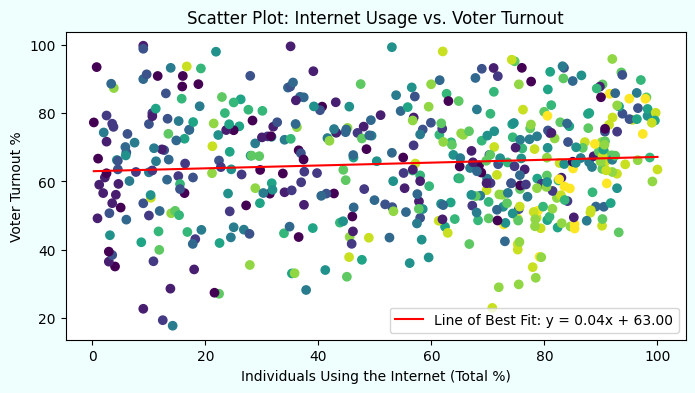

In [24]:
import matplotlib.pyplot as plt
import numpy as np

x_data = merged_df['Individuals using the Internet, total (%)']
y_data = merged_df['Voter Turnout']

color_variable = merged_df['Year']

plt.figure(figsize=(8, 4))

#Create a scattergraph with the Individuals using the Internet and the Voter Turnout
plt.scatter(x_data, y_data, c=color_variable)

#Create Labels on the X and Y axes.
plt.xlabel('Individuals Using the Internet (Total %)')
plt.ylabel('Voter Turnout %')
plt.title('Scatter Plot: Internet Usage vs. Voter Turnout')

# Perform linear regression
slope, intercept = np.polyfit(merged_df['Individuals using the Internet, total (%)'], merged_df['Voter Turnout'], 1)

# Plot the regression line
x_values = np.linspace(merged_df['Individuals using the Internet, total (%)'].min(), merged_df['Individuals using the Internet, total (%)'].max(), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}')

# Add legend
plt.legend(loc = 'lower right')


plt.show()

This visualisation indicates there is a weak positive correlation of Internet Access to Voter Turnout Globally. It would be good to look at how the data is distributed here to see if the data is more or less dense/or if there is a normal distribution

#### Create a Histogram to look at the distribution <a name = "CreateAHistogram"></a>

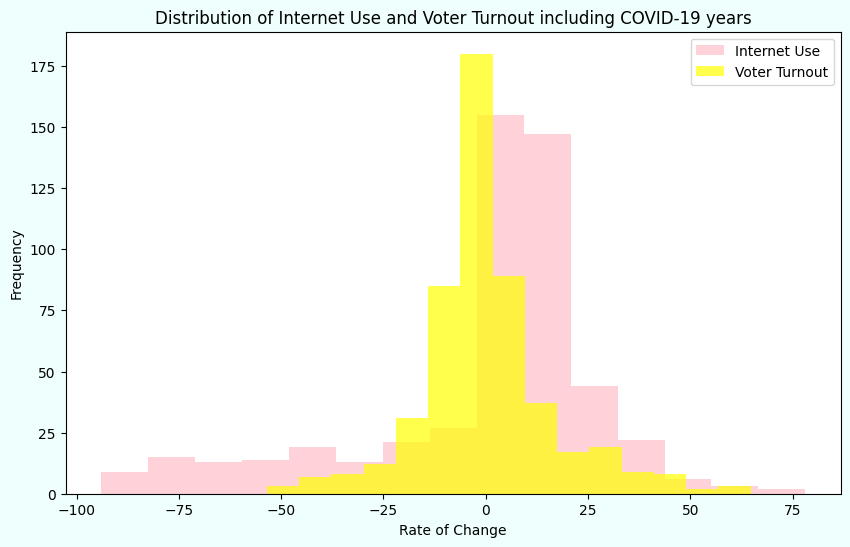

In [25]:
#Create the histogram

#Working out the rate of change of internet use
internet_differences = merged_df['Individuals using the Internet, total (%)'].diff()

#Working out the rate of change of voter turnout
voter_differences = merged_df['Voter Turnout'].diff()

# Categorise the data so we can see the distribution clearly. 
bins_internet_use = 15 
bins_voter_turnout = 15 

#Change the size of the graph
plt.figure(figsize=(10, 6))

# Create the first histogram for Internet Use
plt.hist(internet_differences, bins=bins_internet_use, color='pink', alpha=0.7, label='Internet Use')

# Create the second histogram for Voter Turnout
plt.hist(voter_differences, bins=bins_voter_turnout, color='yellow', alpha=0.7, label='Voter Turnout')

# Add labels and title to the Histogram
plt.title('Distribution of Internet Use and Voter Turnout including COVID-19 years')
plt.xlabel('Rate of Change')
plt.ylabel('Frequency')

# Add legend
plt.legend(['Internet Use', 'Voter Turnout'])


plt.show()

Looking at the rate of change between the Internet Use and the Voter Turnout, we can see that both the distributions are reasonably normal, although the Internet use distribution has a long left tail, which indicates that there is potentially outliers in need of exploration. 

The voter turnout distribution lies slightly to the left of that of the Internet Use distribution, which indicates that the Rate of Change for the Voter Turnout has more frequent data points in the rate of change that's between 0 and -25, which is lower than that of the Internet Use dataset. This possibly would not be reflected in the mean, because the Internet Use data set has outliers/ a long tail on the left. 

In [26]:
print(internet_differences.mean())
print(voter_differences.mean())

0.041176470588235474
0.09403921568627446


### Regional Analysis <a name="regional analysis"></a>

##### Create a Line Graph for the regions <a name="RegionalLineGraph"></a>

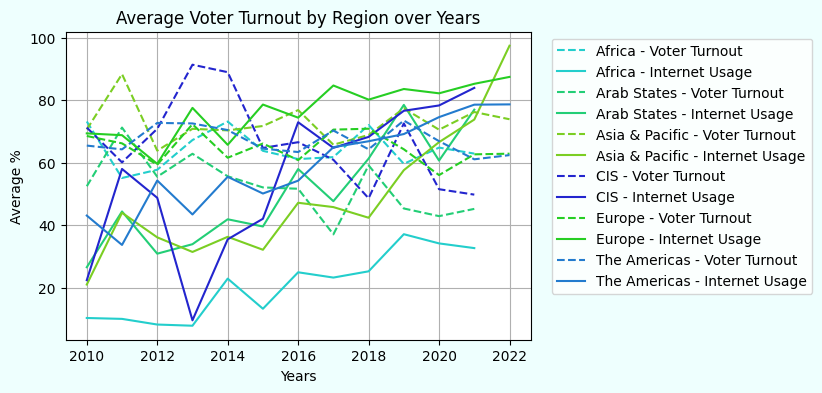

In [27]:
average_by_region_year = merged_df.groupby(['Region','Year'])['Voter Turnout'].mean().unstack()
average_by_region_year
average_Int_Usage_by_region_year = merged_df.groupby(['Region','Year'])['Individuals using the Internet, total (%)'].mean().unstack()
# # Plotting separate lines for each region
plt.figure(figsize=(6, 4))

for i, region in enumerate(average_by_region_year.index):
    plt.plot(
        average_by_region_year.columns, 
        average_by_region_year.loc[region],
        linestyle='dashed',
        label=f'{region} - Voter Turnout', 
        color=region_color_dict.get(region, custom_region_cmap(i)),
    ) 
    plt.plot(
        average_Int_Usage_by_region_year.columns,
        average_Int_Usage_by_region_year.loc[region],
        label=f'{region} - Internet Usage',
        color=region_color_dict.get(region, custom_region_cmap(i)),
    )
    
plt.xlabel('Years')
plt.ylabel('Average %')
plt.title('Average Voter Turnout by Region over Years')
plt.legend(bbox_to_anchor=(1.03,1), loc='upper left')
plt.grid(True)
plt.show()

You can see from the above line graph that although the internet Usage generally has a positive trend, then Voter Turnout is not reflected the same way. If we were looking for a impact on the voter turnout from the Internet access then we should see a positive or negative correlation in all cases. 

Interestingly, in some cases, it seems like the data in some cases may have a positive, or a slight weak negative correlation. It is a good idea therefore to investigate these particular regional cases.

##### Regional Scatterplots with regression <a name="RegScatPltReg"></a>

Region: Asia & Pacific, Data Length: 86
Region: Europe, Data Length: 157
Region: Arab States, Data Length: 44
Region: Africa, Data Length: 93
Region: The Americas, Data Length: 105
Region: CIS, Data Length: 26


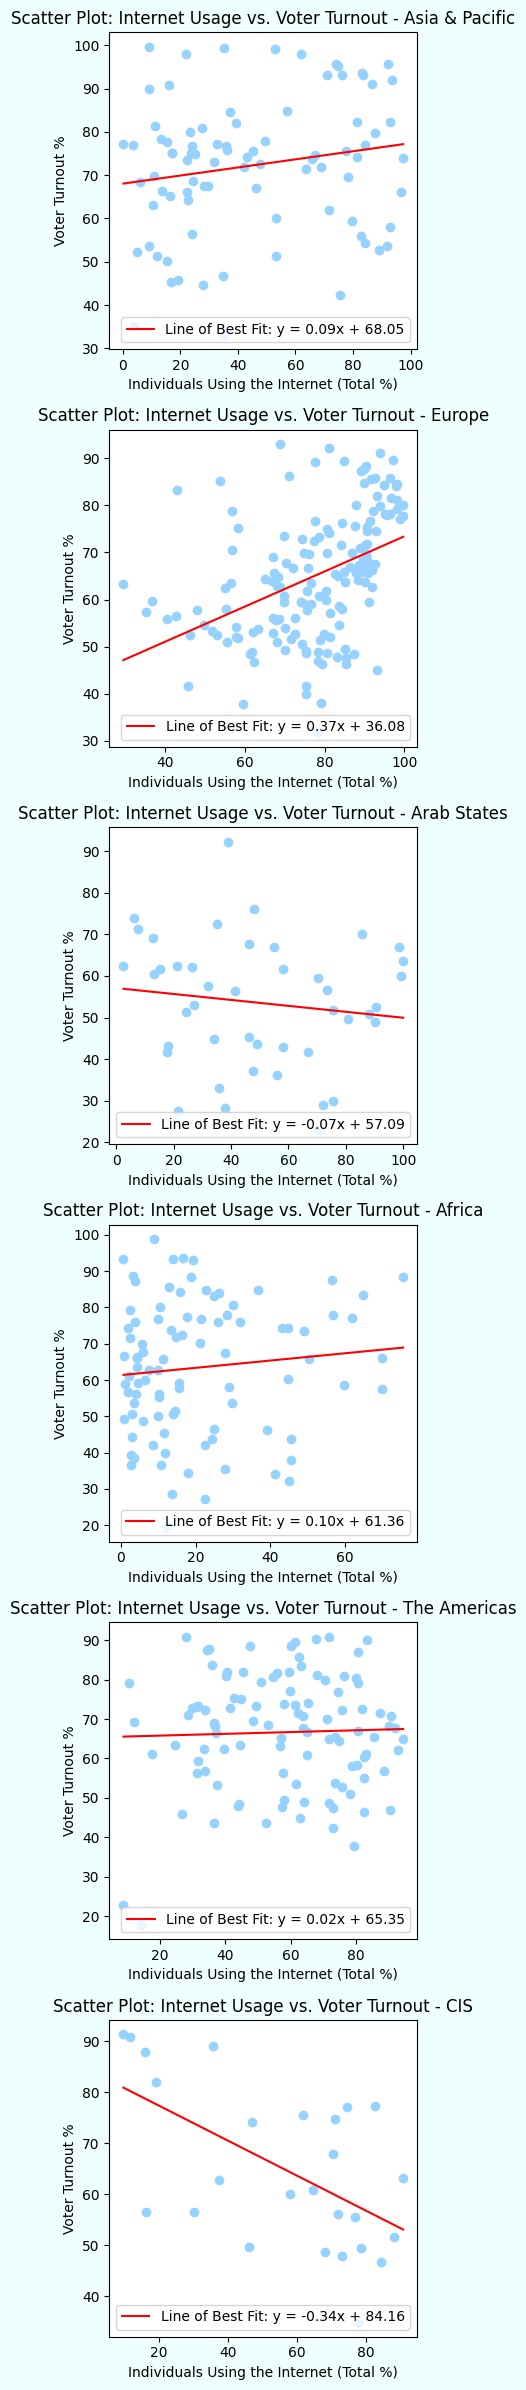

In [28]:
import numpy as np

# Assuming 'Region', 'Individuals using the Internet, total (%)', and 'Voter Turnout' are columns in your DataFrame
# Replace this with your actual dataset
# ...

# Get unique regions
regions = merged_df['Region'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(4, 4 * len(regions)))

for i, region in enumerate(regions):
    # Filter data for the current region
    x_data = merged_df.loc[merged_df['Region'] == region, 'Individuals using the Internet, total (%)']
    y_data = merged_df.loc[merged_df['Region'] == region, 'Voter Turnout']  

    print(f"Region: {region}, Data Length: {len(x_data)}")  # Debugging statement

    # Check if x_data is not empty before attempting to plot
    if len(x_data) > 0:
        # Create a scatter plot for the current region
        axes[i].scatter(x_data, y_data)

        # Labels and title for the subplot
        axes[i].set_xlabel('Individuals Using the Internet (Total %)')
        axes[i].set_ylabel('Voter Turnout %')
        axes[i].set_title(f'Scatter Plot: Internet Usage vs. Voter Turnout - {region}')

        # Perform linear regression for the current region
        slope, intercept = np.polyfit(x_data, y_data, 1)

        # Plot the regression line
        x_values = np.linspace(x_data.min(), x_data.max(), 100)
        y_values = slope * x_values + intercept
        axes[i].plot(x_values, y_values, color='red', label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}')

        # Add legend
        axes[i].legend(loc='lower right')

plt.tight_layout()

# Show the plots
plt.show()

We can see in the above scatter plots that the differing regions have different correlations of internet access to voter turnout. 

For Example, in Europe, where we have a large amount of data, we can see that the correlation is a reasonably positive correlation. On the other hand, in CIS we see there is a reasonable negative correlation, although the data set here is less densely populated. 

Most regions have a weak correlation, although in most cases the correlation is still positive. 

Something which is really interesting to consider, and would offer a really valid basis of research for a researcher would be to see individually user trends in these regions. For example would the CIS have an impact on their voter turnout as a result of use of social media -  access to foreign media etc. A really valuable follow on to this reasearch could be looking into the demographics of voters and the demographics of internet users.

Given my background, I am particularly interested in looking at the CIS for their voter turnout. It would be interesting to look at the individual countries themselves and see their voter turnout in regard to their internet usage and their political situations at the time. 

If I have time later. I would like to compare this data to other datasets, such as protest data - as this could work really well to highlight perhaps why there is a negative trend.  

### Look at CIS in more detail <a name="Outliers"></a>

In [29]:
# I want to have a look at the CIS region in more detail. Looking at the voter turnout vs the internet access. 

#Create a filter for the data:
CIS_data = merged_df[merged_df['Region']=="CIS"]

# Retrieve the countries, voter turnout and internet access in a pivot table. 
CIS_data.pivot_table(
    index= ['Region','Country', 'Year','Voter Turnout'],
    values= 'Individuals using the Internet, total (%)',
    aggfunc={'Individuals using the Internet, total (%)':"mean"}
)

Individuals using the Internet, total (%)
Region Country            Year Voter Turnout                                           
CIS    Armenia            2012 62.87                                          37.500000
                          2017 60.93                                          64.744884
                          2018 48.63                                          68.245052
                          2021 49.39                                          78.612258
       Azerbaijan         2010 49.76                                          46.000000
                          2015 55.54                                          77.000000
                          2020 46.84                                          84.599996
       Belarus            2012 74.20                                          46.910000
                          2016 74.68                                          71.113046
                          2019 77.31                                          82.789152
       Kazakhstan         2012 75.44                                          61.906627
                          2016 77.10                                          74.587726
                          2021 63.25                                          90.923951
       Kyrgyzstan         2010 56.59                                          16.300000
                          2015 56.62                                          30.247043
                          2020 56.20                                          72.000000
                          2021 34.94                                          77.920359
       Russian Federation 2011 60.10                                          58.000000
                          2016 47.88                                          73.091435
                          2021 51.58                                          88.213846
       Tajikistan         2010 90.84                                          11.550000
                          2015 82.00                                          18.980000
       Turkmenistan       2013 91.33                                           9.600000
       Uzbekistan         2010 87.76                                          15.900000
                          2014 88.94                                          35.500000
                          2019 67.80                                          70.399999

As we can see looking at this particular data set, there are a number of years missing for votes. For example Turkmenistan has only 1 year of voting data, and in that particular year a very low reported internet access. This is an outlier as the country itself cannot show any trends. 

It is also worth noting here, that because we are considering the years up to 2021, we are including data for years where there is a global pandemic. This could indicate a drop in all countries around the world in the years between 2019-2022. That said, it might be worth considering the data again up to 2019, to see if this changes the visualisations of the data. 

### Consider the data ignoring 2019-2022 to ignore Covid data <a name = "UpdateDataSet"></a>

In [30]:
non_covid_df =merged_df.copy()

In [31]:
from scipy.stats import pearsonr

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(
    non_covid_df['Voter Turnout'],
    non_covid_df['Individuals using the Internet, total (%)']
)

print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-Value: {p_value}')

Correlation Coefficient: 0.07718154394156618
P-Value: 0.08132650078885


In [32]:
# I need to remove all years after (and including) 2019 as these are not considered in the main data set
non_covid_df = non_covid_df[non_covid_df['Year'] < 2019]

#Check that the function has worked correctly. 
non_covid_df

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
0,Afghanistan,Asia & Pacific,AFG,2010,4.0,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14,0
8,Afghanistan,Asia & Pacific,AFG,2018,16.8,520.0,NaN,502.057099,3.632,NaN,4.1,0.299083,155.761603,29.954154,45.23,8
16,Albania,Europe,ALB,2013,51.8,4540.0,NaN,4413.063397,5.550,NaN,5.3,1.656390,22.474050,0.495023,53.31,3
20,Albania,Europe,ALB,2017,62.4,4290.0,33.1,4531.032207,4.644,NaN,4.7,1.880557,18.331086,0.427298,46.76,2
28,Algeria,Arab States,DZA,2012,18.2,5220.0,NaN,5610.733306,NaN,NaN,2.9,3.621368,NaN,NaN,43.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Viet Nam,Asia & Pacific,VNM,2016,53.0,2580.0,35.3,2760.717101,5.061,NaN,7.7,2.384160,13.199993,0.511628,99.26,0
2516,Zambia,Africa,ZMB,2011,3.5,1390.0,NaN,1644.456831,NaN,NaN,10.3,0.213847,NaN,NaN,53.65,6
2521,Zambia,Africa,ZMB,2016,10.3,1340.0,NaN,1249.923143,4.795,NaN,8.5,0.316995,NaN,NaN,56.03,6
2531,Zimbabwe,Africa,ZWE,2013,15.5,1200.0,NaN,1408.367810,4.827,NaN,18.6,0.901248,86.666667,7.222222,57.78,0


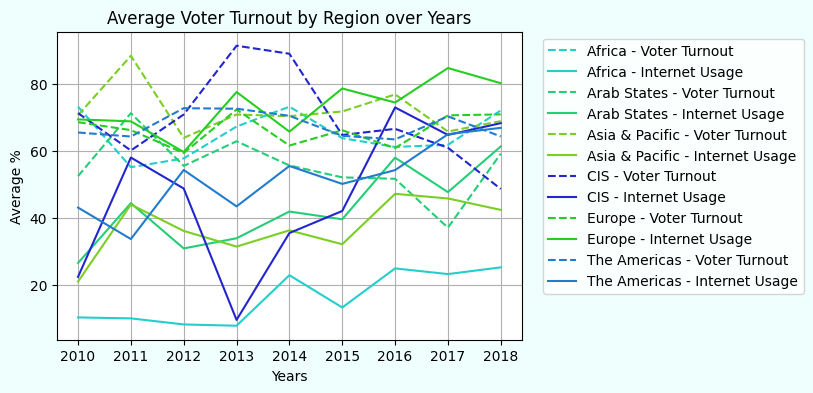

In [33]:
average_by_region_year = non_covid_df.groupby(['Region','Year'])['Voter Turnout'].mean().unstack()
average_by_region_year
average_Int_Usage_by_region_year = non_covid_df.groupby(['Region','Year'])['Individuals using the Internet, total (%)'].mean().unstack()
# # Plotting separate lines for each region
plt.figure(figsize=(6, 4))

for i, region in enumerate(average_by_region_year.index):
    plt.plot(
        average_by_region_year.columns, 
        average_by_region_year.loc[region],
        linestyle='dashed',
        label=f'{region} - Voter Turnout', 
        color=region_color_dict.get(region, custom_region_cmap(i)),
    ) 
    plt.plot(
        average_Int_Usage_by_region_year.columns,
        average_Int_Usage_by_region_year.loc[region],
        label=f'{region} - Internet Usage',
        color=region_color_dict.get(region, custom_region_cmap(i)),
    )
    
plt.xlabel('Years')
plt.ylabel('Average %')
plt.title('Average Voter Turnout by Region over Years')
plt.legend(bbox_to_anchor=(1.03,1), loc='upper left')
plt.grid(True)
plt.show()

It is possible to perhaps spot some trends between the different regions. For example, looking at Africa, you can see that in 2016, the voter turnout increased, as did the internet usage. Although interestingly, in the CIS, it seems there is a reverse approach at play. It is not clear from this image however, a clear trend across regions. 

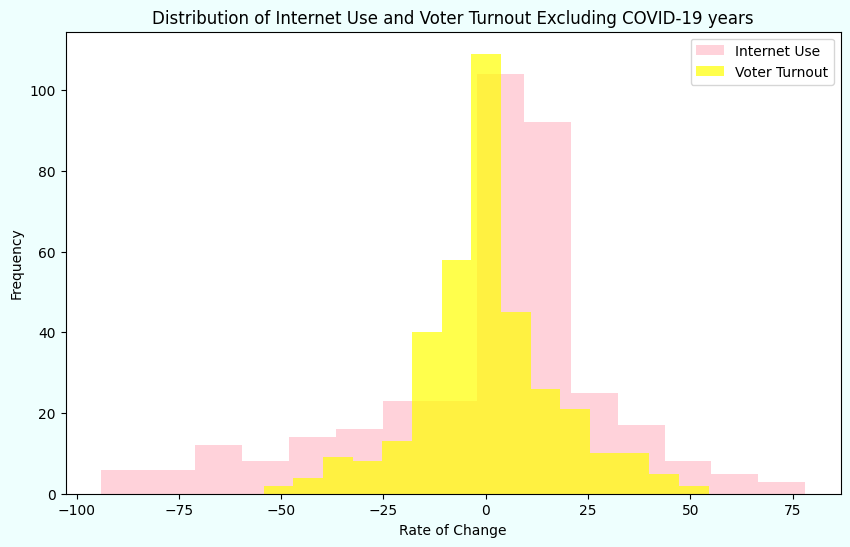

In [34]:
#Create the histogram to show the frequency distribution of the rates of change of the internet and of voter turnout. 

#Working out the rate of change of internet use
internet_differences = non_covid_df['Individuals using the Internet, total (%)'].diff()

#Working out the rate of change of voter turnout
voter_differences = non_covid_df['Voter Turnout'].diff()

# Categorise the data so we can see the distribution clearly. 
bins_internet_use = 15 #I have chosen the number 10
bins_voter_turnout = 15 #I have chosen the number 10

#Change the size of the graph
plt.figure(figsize=(10, 6))

# Create the first histogram for Internet Use
plt.hist(internet_differences, bins=bins_internet_use, color='pink', alpha=0.7, label='Internet Use')

# Create the second histogram for Voter Turnout
plt.hist(voter_differences, bins=bins_voter_turnout, color='yellow', alpha=0.7, label='Voter Turnout')

# Add labels and title to the Histogram
plt.title('Distribution of Internet Use and Voter Turnout Excluding COVID-19 years')
plt.xlabel('Rate of Change')
plt.ylabel('Frequency')

# Add legend
plt.legend(['Internet Use', 'Voter Turnout'])


plt.show()

When compared with the previous histogram, we can see that the data is more normally distributed for the Voter Turnout, although the difference is slight. 

For the Internet Use, we can see that there is a cleardrop in frequency in the rate of change, which indicates that the data is not as normally distributed as it was when incorporating the COVId-19 years. 

Region: Asia & Pacific, Data Length: 63
Region: Europe, Data Length: 105
Region: Arab States, Data Length: 33
Region: Africa, Data Length: 70
Region: The Americas, Data Length: 74
Region: CIS, Data Length: 18


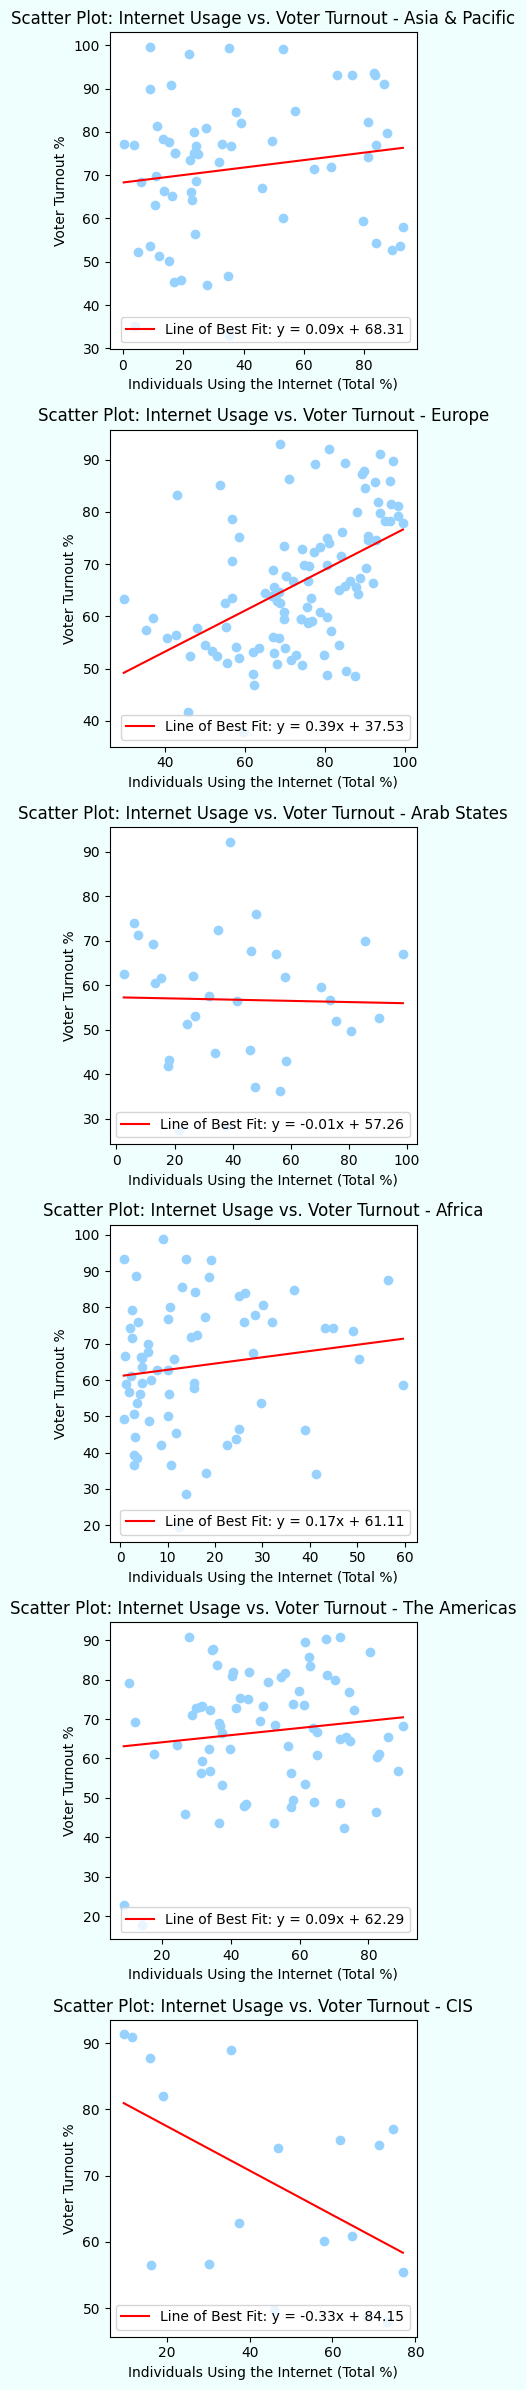

In [35]:
import numpy as np

# Assuming 'Region', 'Individuals using the Internet, total (%)', and 'Voter Turnout' are columns in your DataFrame
# Replace this with your actual dataset
# ...

# Get unique regions
regions = non_covid_df['Region'].unique()

# Set up subplots
fig, axes = plt.subplots(nrows=len(regions), ncols=1, figsize=(4, 4 * len(regions)))

for i, region in enumerate(regions):
    # Filter data for the current region
    x_data = non_covid_df.loc[merged_df['Region'] == region, 'Individuals using the Internet, total (%)']
    y_data = non_covid_df.loc[merged_df['Region'] == region, 'Voter Turnout']

    print(f"Region: {region}, Data Length: {len(x_data)}")  # Debugging statement

    # Check if x_data is not empty before attempting to plot
    if len(x_data) > 0:
        # Create a scatter plot for the current region
        axes[i].scatter(x_data, y_data)

        # Labels and title for the subplot
        axes[i].set_xlabel('Individuals Using the Internet (Total %)')
        axes[i].set_ylabel('Voter Turnout %')
        axes[i].set_title(f'Scatter Plot: Internet Usage vs. Voter Turnout - {region}')

        # Perform linear regression for the current region
        slope, intercept = np.polyfit(x_data, y_data, 1)

        # Plot the regression line
        x_values = np.linspace(x_data.min(), x_data.max(), 100)
        y_values = slope * x_values + intercept
        axes[i].plot(x_values, y_values, color='red', label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}')

        # Add legend
        axes[i].legend(loc='lower right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

These graphs, when compared with the original dataset are quite enlightening. 

In most cases, the correlation has strengthened. So for example, in EUR, APAC, AF and the Americas the correlation has been strengthened, this implies that there could be a relationship between the turnout and covid in those years. 

What I find really interesting is that even removing the covid years, in the CIS the data has exactly the same correlation - indicating that covid likely did not have an impact on the voter turnout there. Furthermore, while the Arab States has a very insignificant positive correlation, now has almost no significant correlation, but has swayed negative, which indicates that the voter rates were not impacted by covid, in actual fact the covid years were providing a higher voter Turnout. This could potentially then suggest that there were some extraneous variables that might suggest a reason for Voter Turnout to be higher. 

It's worth noting that the initial Voter Turnout for the Arab States in 2010 was 57.26, therefore, the voter turnout has never been significantly high. It is safe to say that only in Europe is there a confident correlation  

This correlation coefficient suggest that there is a weak positive correlation between the Internet Penetration and Voter Turnout, but the P Value is lower than 0.05 which means that there is likely statistical significance of my correlation. This tells me that the data I am considering perhaps does have enough significance to say that differences are not due to chance and would indicate that we would be able to reject the null hypothesis (That political engagement does not change with an increase of internet access). 

### Protest Analysis <a name="Analysis"></a>

In [36]:
#Take of the two years 19-20 to account for covid:

merged_df = merged_df[merged_df['Year']<2019]
merged_df.head()

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
0,Afghanistan,Asia & Pacific,AFG,2010,4.0,520.0,NaN,554.594735,NaN,NaN,4.3,0.304230,NaN,NaN,35.14,0
8,Afghanistan,Asia & Pacific,AFG,2018,16.8,520.0,NaN,502.057099,3.632,NaN,4.1,0.299083,155.761603,29.954154,45.23,8
16,Albania,Europe,ALB,2013,51.8,4540.0,NaN,4413.063397,5.550,NaN,5.3,1.656390,22.474050,0.495023,53.31,3
20,Albania,Europe,ALB,2017,62.4,4290.0,33.1,4531.032207,4.644,NaN,4.7,1.880557,18.331086,0.427298,46.76,2
28,Algeria,Arab States,DZA,2012,18.2,5220.0,NaN,5610.733306,NaN,NaN,2.9,3.621368,NaN,NaN,43.14,0


In [37]:
x_data = merged_df['Individuals using the Internet, total (%)']
y_data = merged_df['Protest Total']

# Print lengths of x_data and y_data
print(f"Length of x_data: {len(x_data)}")
print(f"Length of y_data: {len(y_data)}")


Length of x_data: 363
Length of y_data: 363


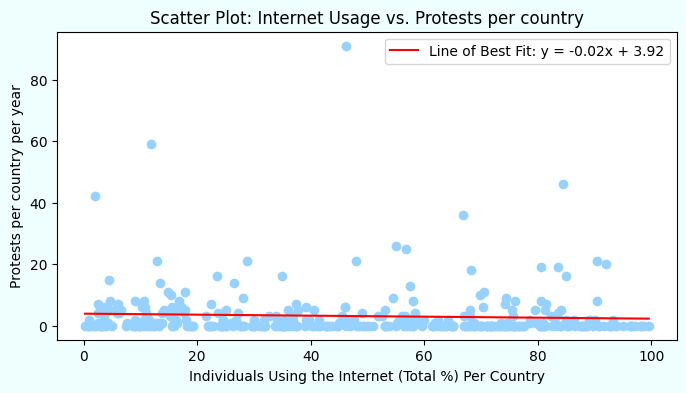

In [38]:
#Create a visualisation that displays the general trends in a line graph
from scipy.stats import pearsonr

plt.figure(figsize=(8, 4))

#Create a scattergraph with the Individuals using the Internet and the Voter Turnout
plt.scatter(x_data, y_data)

#Create Labels on the X and Y axes.
plt.xlabel('Individuals Using the Internet (Total %) Per Country')
plt.ylabel('Protests per country per year')
plt.title('Scatter Plot: Internet Usage vs. Protests per country')

# Perform linear regression
slope, intercept = np.polyfit(x_data, y_data, 1)

# Plot the regression line
x_values = np.linspace(x_data.min(), x_data.max(), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}')

# Add legend
plt.legend(loc ='best')

plt.show()

In [39]:
#Clean the data and then replot to see the data without zeros. 

#Delete all rows where protest = 0 as this indicates there were no protests there. Dropping the zeros could potentially help me to identify a link between the countries that did have protests and those that have increased internet usage. 
summary_df = merged_df[merged_df['Protest Total'] != 0]
summary_df.head()

,Country,Region,ISO,Year,"Individuals using the Internet, total (%)",GNI per capita,GINI Index,GDP Per Capita,Happiness Index,Literacy,Suicide Rates,CO2 Emissions,Internet_Price,Internet Price Ratio,Voter Turnout,Protest Total
8,Afghanistan,Asia & Pacific,AFG,2018,16.800000,520.0,NaN,502.057099,3.632,NaN,4.1,0.299083,155.761603,29.954154,45.23,8
16,Albania,Europe,ALB,2013,51.800000,4540.0,NaN,4413.063397,5.550,NaN,5.3,1.656390,22.474050,0.495023,53.31,3
20,Albania,Europe,ALB,2017,62.400000,4290.0,33.1,4531.032207,4.644,NaN,4.7,1.880557,18.331086,0.427298,46.76,2
33,Algeria,Arab States,DZA,2017,47.691055,3970.0,NaN,4134.936099,5.872,NaN,2.5,3.833681,40.931893,1.031030,37.09,2
54,Angola,Africa,AGO,2012,7.700000,4060.0,NaN,4962.552072,NaN,NaN,6.9,0.947583,180.000000,4.433498,62.77,1


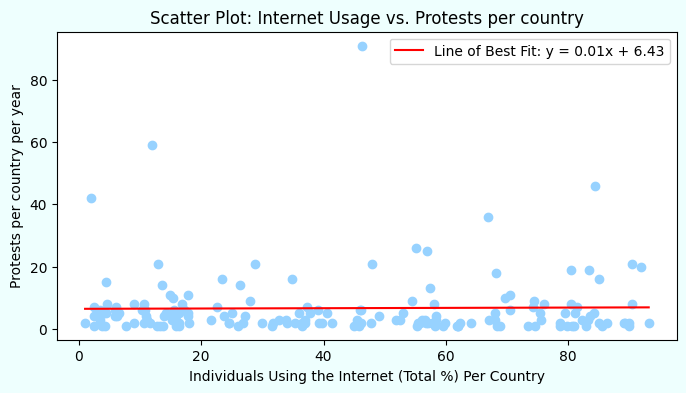

In [40]:
#Create a visualisation that displays the general trends in a line graph

xdata = summary_df['Individuals using the Internet, total (%)']
ydata = summary_df['Protest Total']

plt.figure(figsize=(8, 4))

# Create a scatter plot with the Individuals using the Internet and the Protest Total
plt.scatter(xdata, ydata)

# Create labels on the X and Y axes.
plt.xlabel('Individuals Using the Internet (Total %) Per Country')
plt.ylabel('Protests per country per year')
plt.title('Scatter Plot: Internet Usage vs. Protests per country')

# Perform linear regression
slope, intercept = np.polyfit(xdata, ydata, 1)

# Plot the regression line
x_values = np.linspace(xdata.min(), xdata.max(), 100)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}')

# Add legend
plt.legend(loc='best')

plt.show()

In [41]:
#Check the correlation coefficient 
#Check the significance

from scipy.stats import pearsonr

correlation, p_value = pearsonr(xdata, ydata)
print(f'Correlation coefficient: {correlation:.2f}')
print(f'P-value: {p_value:.4f}')

Correlation coefficient: 0.01
P-value: 0.8581


## Conclusion <a name = "Conclusion"></a>

There is a weak negative correlation between the two - protests seemingly are weakly correlated with the internet usage rates. This does not prove the hypothesis (and it does not provide enough evidence to reject the null hypothesis. There is no correlation between internet rates and protests. It implies that in order to investigate the relationship further, there would need to be a bigger investigation into other factors, as clearly there is more to investigate than simply the voter turnout and the protest rate. The P-value indicates that the data is not statisically significant and as there is no strong correlation then it indicates that the protests are not impacted or correlated with Internet Use alone, and something else perhaps could explain an increase. 

It's important to note, that the datasets used here have been quite small and therefore will possibly have impacted on the ability to draw conclusions from what is presented. Given more time, I would have liked to have drawn on more sources, such as social media usage with the internet, and potentially also links between social media, internet usage and protests, as anecdotally we have seen those in the past with movements such as #metoo and #blacklivesmatter. 